In [1]:
import kontrol.core
import control

tf = control.ss2tf(control.rss(50))
kontrol_tf = kontrol.TransferFunction(tf)
# kontrol_tf.foton()
print(kontrol_tf.foton())
# tf_list = kontrol.core.controlutils.tf_order_split(tf, max_order=5)

17:14 Kontrol WARNING : The transfer function has order higher than 20. This is not supported by KAGRA's Foton software. The Foton expression is splitted into multiple expressions with less order.


zpk([-2.9741935865575084+i*-3.698556049631673;-2.9741935865575084+i*3.698556049631673;-5.12073516105306;-0.8415488445325774+i*-5.602741864196646;-0.8415488445325774+i*5.602741864196646;-0.8737406378762526+i*-5.76308296562682;-0.8737406378762526+i*5.76308296562682;-6.273612723879278;-1.5347249190881913+i*6.923396545152964;-1.5347249190881913+i*-6.923396545152964;-7.197315567122069;-6.897106300246676+i*2.9659333226587363;-6.897106300246676+i*-2.9659333226587363;-6.801108871808288+i*7.832873350710911;-6.801108871808288+i*-7.832873350710911;1.3588235020917658+i*-15.787876768493762;1.3588235020917658+i*15.787876768493762;-7.922163740625917+i*-19.55168097180382;-7.922163740625917+i*19.55168097180382;4650.501198863242],[-0.8399807148986889+i*-5.600510739618548;-0.8399807148986889+i*5.600510739618548;-0.8431078739043857+i*-5.604972718583003;-0.8431078739043857+i*5.604972718583003;-5.788110559915696;-0.3709751531070667+i*5.829629129900139;-0.3709751531070667+i*-5.829629129900139;-7.041733335968

In [2]:
import numpy as np
import control
import kontrol
s = control.tf("s")
tf_test = np.pi*(s+3*np.pi)/(s+np.pi)/(s**2+s+5**2)/(s+1.5)/s**2
zpk_str_n = ('zpk([-0.0;1.5],[0.23873239741798644;0.23873243185770118;'
             '0.4999999999999977;0.07957747154594766+i*0.7917858446492736;'
             '0.07957747154594766+i*-0.7917858446492736],'
             '1.0527578027828701,'
             '"n")')
rpoly_str = ('rpoly([1.0;9.42477796076938;0.0],[1.0;7.141592653589788;'
             '42.816370614359144;172.283177771091;298.93803248981106;'
             '176.7145867644253],3.141592653589793)')

tf_test.minreal().num[0][0][0]*2*np.pi*3*np.pi/np.pi/5**2/1.5/1.5

## test raises
# try:
kontrol.core.foton.tf2foton(tf_test, expression="zpk", root_location="f")
#     raise
# except ValueError:
#     pass
# zpk_str_n_test = kontrol.core.foton.tf2foton(
#     tf_test, expression="zpk", root_location="n")

'zpk([-1.5],[0.0;0.0;-0.23873241463784298;-0.5000000000000003;-0.07957747154594727+i*0.7917858446492733;-0.07957747154594727+i*-0.7917858446492733],3.141592653589793,"f")'

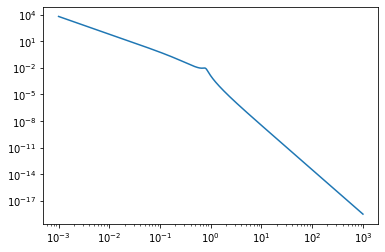

In [3]:
import matplotlib.pyplot as plt
f = np.logspace(-3, 3, 1001)

plt.loglog(f, abs(tf_test(1j*2*np.pi*f)))


In [4]:
abs(tf_test(1j*2*np.pi*0.748169))

0.009714817099869657

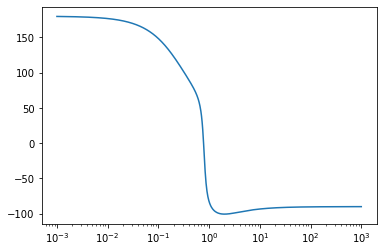

In [5]:
plt.semilogx(f, 180/np.pi*control.unwrap(np.angle(tf_test(1j*2*np.pi*f))))

In [6]:
6.614672358463981/3.14/2

1.0532917768254746

In [7]:
len(tf_list)

NameError: name 'tf_list' is not defined

In [ ]:
import numpy as np
tf_split = np.prod(tf_list)

In [ ]:
tf_split.pole()

In [ ]:
tf.pole()

In [ ]:
np.allclose(np.log(tf(1j*2*np.pi*f)), np.log(tf_split(1j*2*np.pi*f)))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
f = np.logspace(-3, 3, 100000)

plt.loglog(f, abs(tf(1j*2*np.pi*f)))
plt.loglog(f, abs(tf_split(1j*2*np.pi*f)))

In [ ]:
tf.dcgain()

In [ ]:
plt.semilogx(f, np.angle(tf(1j*2*np.pi*f)))
plt.semilogx(f, np.angle(tf_split(1j*2*np.pi*f)))

In [ ]:
import kontrol
import control
import numpy as np
import matplotlib.pyplot as plt
import kontrol.frequency_series.noise_models

# lvdt_noise = kontrol.core.frequency_series.noise_models()
# lpf = control.tf([1], [1, 1])
# hpf = 1 - lpf
omega = np.logspace(-2,2,1000)
f = omega/2/np.pi
# lvdt_noise = kontrol.core.frequency_series.noise_models.lvdt_noise(f=f)
# geophone_noise = kontrol.core.frequency_series.noise_models.geophone_noise(f=f)
tf_noise1 = control.tf([1/10, 1], [1/0.1, 1]) *10
tf_noise2 = control.tf([1/0.1, 1], [1/10, 1]) 

comp = kontrol.ComplementaryFilter(noise1=tf_noise1, noise2=tf_noise2)
comp.hinfsynthesis()
comp.f = f

plt.loglog(omega, comp.noise1)
plt.loglog(omega, comp.noise2)
plt.loglog(omega, comp.noise_super)

# comp = cm.ComplementaryFilter(noise1=lvdt_noise, noise2=geophone_noise, f=f, unit="omega")

# plt.loglog(omega, lvdt_noise)
# plt.loglog(omega, geophone_noise)
# plt.loglog(omega, abs(lpf(1j*omega)))
# plt.loglog(omega, abs(hpf(1j*omega)))

In [ ]:
comp.noise_super[400:600]

In [ ]:
new_omega = np.logspace(-3, 7, 1000000)
# plt.loglog(comp.omega, abs(comp.filter1(1j*comp.omega)))
plt.loglog(new_omega, abs(comp.filter2(1j*new_omega)))
# plt.loglog(omega, abs(tf_travis(1j*omega)))
plt.loglog(new_omega, abs((1-tf_travis)(1j*new_omega)))
# tf_travis.pole()

In [ ]:
tf_correct = control.tf([1, 2.08392466e+04, 1.58200377e+04, 2.53883414e+03, 1.16522184e+02], [1, 2.08679038e+04, 1.64005175e+04, 5.55127674e+03, 8.50146586e+02])
import kontrol.core.controlutils

kontrol.core.controlutils.check_tf_equal(tf_correct, comp[0, 0], allclose_kwargs={"rtol":1e-4})

In [ ]:
tf_travis=control.tf([1.00000000e+00, 6.96103440e+03, 5.28422768e+03, 8.48018504e+02,3.89205080e+01], [1.00000000e+00, 6.97060626e+03, 5.47811529e+03, 1.85421249e+03,2.83960156e+02])

In [ ]:
?kontrol.core.controlutils.check_tf_equal

In [ ]:
tf_correct.dcgain()

In [ ]:
tf_travis.pole()

In [ ]:
comp[0, 0].pole()

In [ ]:
import kontrol.core.complementary_filter.synthesis

h1, h2 = kontrol.core.complementary_filter.synthesis.hinfcomplementary(tf_noise1, tf_noise2)

plt.loglog(omega, abs(h1(1j*omega)))
plt.loglog(omega, abs(h2(1j*omega)))

In [ ]:
comp.noise1

In [ ]:
comp.tf_noise1

In [ ]:
comp.noise1

In [ ]:
comp[0, 0]

In [ ]:
tf_noise1 = control.tf([1/10, 1], [1/0.1, 1]) *10
tf_noise2 = control.tf([1/0.1, 1], [1/10, 1]) 

comp = cm.ComplementaryFilter(noise1=tf_noise1, noise2=tf_noise2)
comp.h2synthesis()


plt.loglog(omega, abs(tf_noise1(omega*1j)))
plt.loglog(omega, abs(tf_noise2(omega*1j)))

In [ ]:
plt.loglog(omega, lvdt_noise)
plt.loglog(omega, geophone_noise)
plt.loglog(omega, comp.noise_super)
# plt.loglog(omega, abs(lpf(1j*omega)))
# plt.loglog(omega, abs(hpf(1j*omega)))

In [ ]:
comp.noise_super

In [ ]:
?kontrol.core.frequency_series.noise_models.lvdt_noise

In [ ]:
import control
import kontrol

tf = control.tf([1], [2, 3])
kontrol_tf = kontrol.TransferFunction(tf)
n_correct = "zpk([],[0.238732414637843],0.3333333333333333,\"n\")"
kontrol_tf_foton_n = kontrol_tf.foton()
# kontrol_tf.foton = "f"
f_correct = "zpk([],[-0.238732414637843],-0.5,\"f\")"
kontrol_tf_foton_f = kontrol_tf.foton()
# kontrol_tf.foton = "s"
s_correct = "zpk([],[-1.5],-0.5,\"s\")"
kontrol_tf_foton_s = kontrol_tf.foton()


In [ ]:
kontrol_tf.foton(expression="zpk", root_location="f")

In [ ]:
kontrol_tf.pole().real > 0

In [ ]:
s = control.tf("s")
tf_unstable = (s-2) / (s-1) / (s**2-s+1)

In [ ]:
kontrol_tf = kontrol.TransferFunction(tf_unstable)
kontrol_tf.stabilize()
kontrol_tf.zero().imag

In [ ]:
tf_unstable.zero()

In [ ]:
import numpy as np
a = [1,2,3,4,5,6,7,8,9,10]
step = 7
for i in range(0,10,step):
    print(a[i:i+step])

In [ ]:
?range

In [ ]:
tf = 1/(s**2 + 10/3.14*s + 10**2)
tf.pole()

In [ ]:
wn = abs(tf.pole()[0])
q = wn/(-2*tf.pole()[0].real)
q